In [1]:
import sys
import numpy as np
import pandas as pd

print("Python version:", sys.version)
print("NumPy version:", np.__version__)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy version: 2.0.2


In [5]:
# !pip install --force-reinstall --no-binary :all: statsmodels


  Using cached statsmodels-0.14.5.tar.gz (20.5 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 

In [2]:
!pip install --upgrade --pre statsmodels


In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("ARIMA imported successfully!")


ARIMA imported successfully!


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#!/bin/bash
!kaggle datasets download meetnagadia/apple-stock-price-from-19802021

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021
License(s): ODbL-1.0
  0% 0.00/206k [00:00<?, ?B/s]
100% 206k/206k [00:00<00:00, 639MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/apple-stock-price-from-19802021.zip')
zip_ref.extractall('/content')
zip_ref.close()

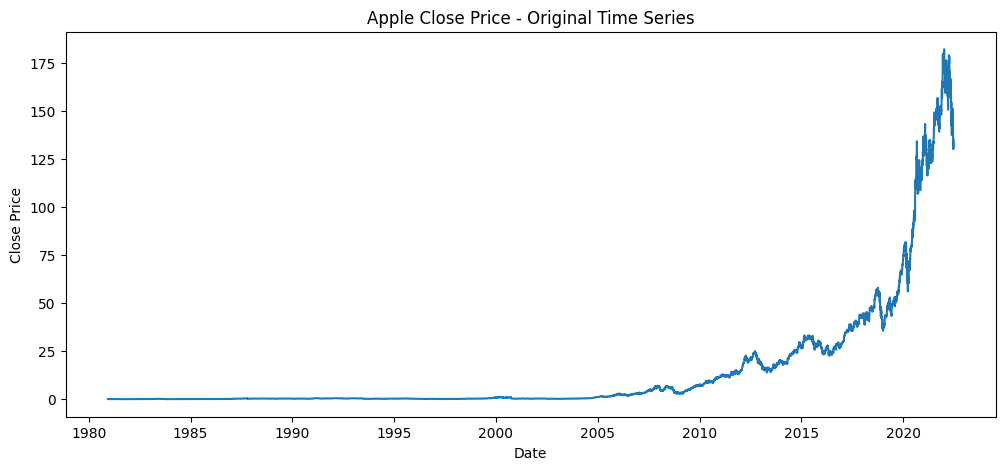

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

series = df['Close']

# Plot the original series
plt.figure(figsize=(12,5))
plt.plot(series)
plt.title("Apple Close Price - Original Time Series")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value}")

print("ADF Test for Original Series:")
adf_test(series)


ADF Test for Original Series:
ADF Statistic: 1.4731411251062918
p-value: 0.9974223502630891
Critical Values:
    1%: -3.430977244959254
    5%: -2.861817206213124
    10%: -2.566917551723334


ADF Test after 1st Difference:
ADF Statistic: -14.611313676592985
p-value: 4.01862496625801e-27
Critical Values:
    1%: -3.4309773051299146
    5%: -2.861817232802289
    10%: -2.566917565876739


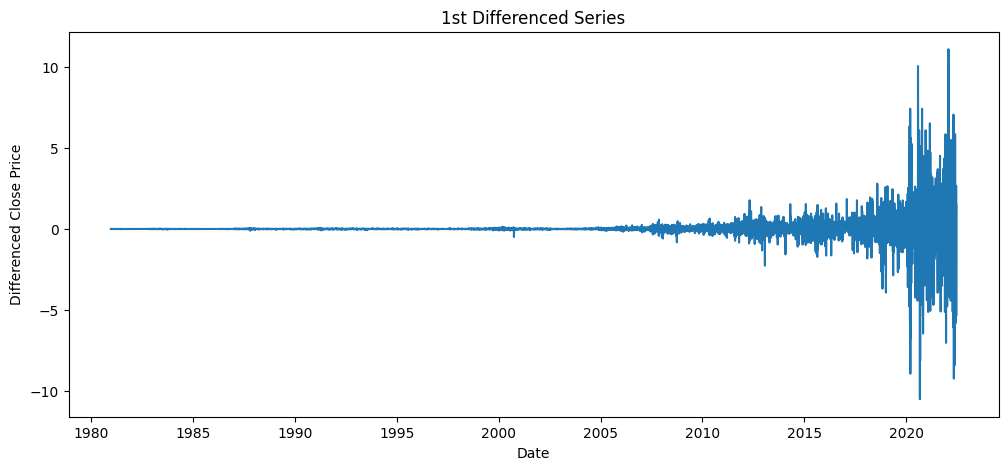

In [9]:
# First difference
diff1 = series.diff().dropna()

print("ADF Test after 1st Difference:")
adf_test(diff1)

# Plot differenced series
plt.figure(figsize=(12,5))
plt.plot(diff1)
plt.title("1st Differenced Series")
plt.xlabel("Date")
plt.ylabel("Differenced Close Price")
plt.show()


<Figure size 1200x600 with 0 Axes>

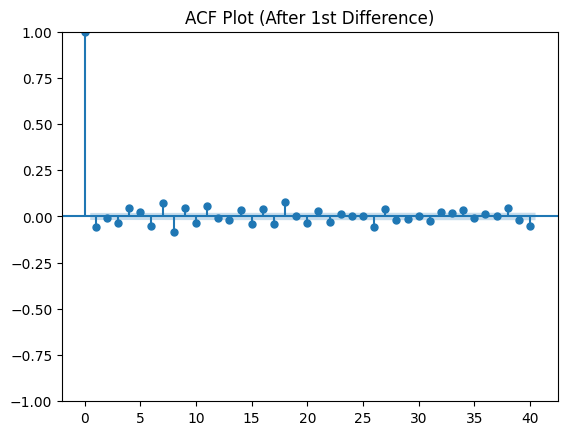

<Figure size 1200x600 with 0 Axes>

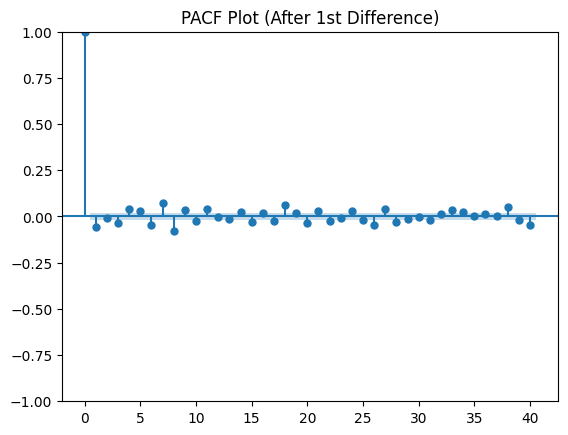

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_acf(diff1, lags=40)
plt.title("ACF Plot (After 1st Difference)")
plt.show()

plt.figure(figsize=(12,6))
plot_pacf(diff1, lags=40, method='ywm')
plt.title("PACF Plot (After 1st Difference)")
plt.show()


## Log Transform approach

In [29]:
df = pd.read_csv("/content/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Log-transform the close prices
df['LogClose'] = np.log(df['Close'])
log_series = df['LogClose']

In [30]:
train_size = int(len(log_series) * 0.8)
train_log = log_series[:train_size]
test_log  = log_series[train_size:]


In [31]:
model = ARIMA(train_log, order=(4,1,4))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               LogClose   No. Observations:                 8374
Model:                 ARIMA(1, 1, 1)   Log Likelihood               17236.401
Date:                Thu, 20 Nov 2025   AIC                         -34466.801
Time:                        02:02:00   BIC                         -34445.703
Sample:                             0   HQIC                        -34459.596
                               - 8374                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1392      0.329      0.424      0.672      -0.505       0.783
ma.L1         -0.1174      0.330     -0.356      0.722      -0.764       0.529
sigma2         0.0010   3.53e-06    269.967      0.0

In [32]:
start = len(train_log)
end = len(train_log) + len(test_log) - 1

log_forecast = model_fit.predict(start=start, end=end, typ='levels')


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [33]:
price_forecast = np.exp(log_forecast)

# Extract actual test prices for comparison
actual_prices = df['Close'][train_size:]


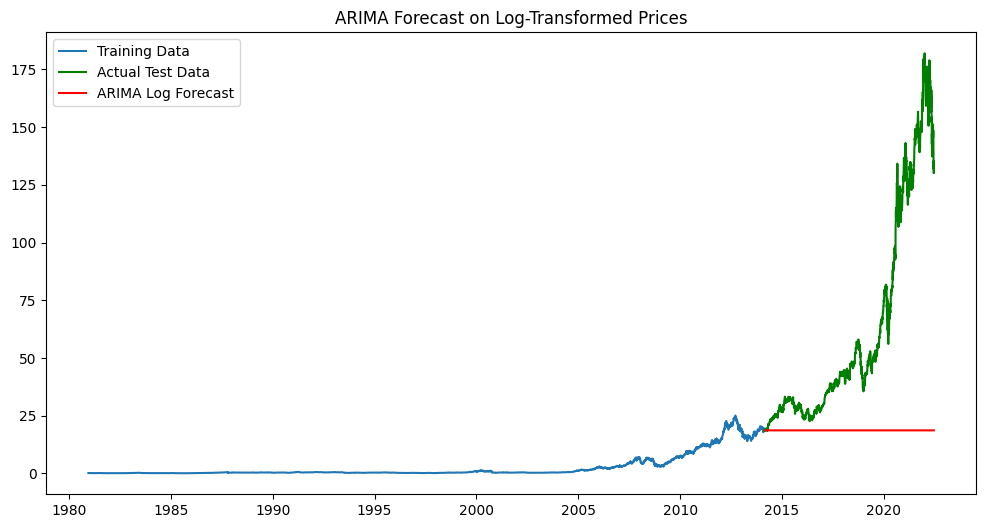

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df.index[:train_size], df['Close'][:train_size], label='Training Data')
plt.plot(df.index[train_size:], actual_prices, label='Actual Test Data', color='green')
plt.plot(df.index[train_size:], price_forecast, label='ARIMA Log Forecast', color='red')
plt.title("ARIMA Forecast on Log-Transformed Prices")
plt.legend()
plt.show()


## Original Approach

In [11]:
data = pd.read_csv('AAPL.csv')

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


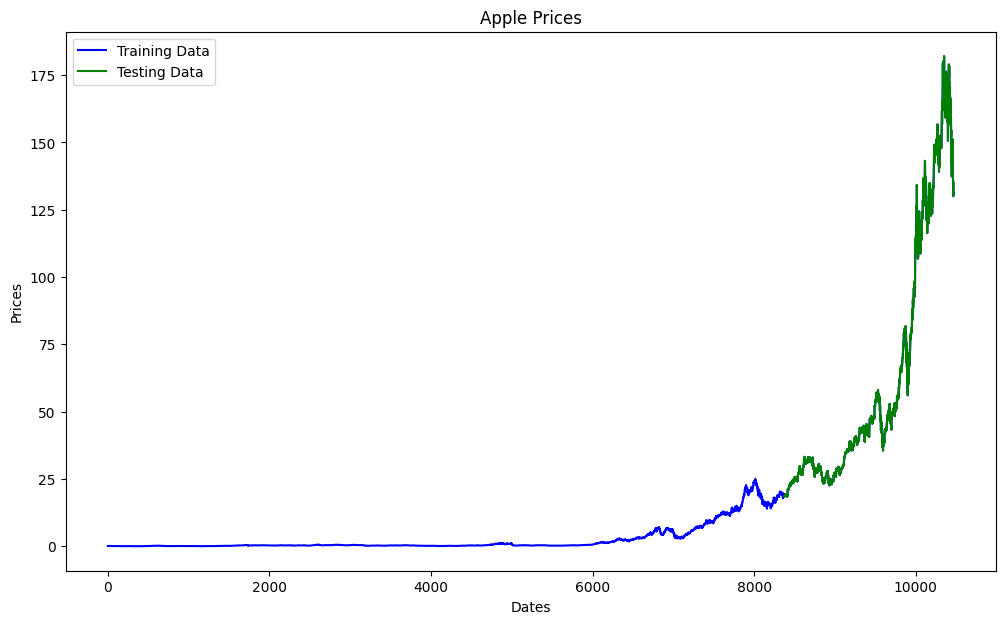

In [13]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [14]:
train_series = train_data['Close'].values
test_series = test_data['Close'].values

# fit initial model
model = ARIMA(train_series, order=(5,1,0))
model_fit = model.fit()

predictions = []

for t in range(len(test_series)):
    # forecast next value
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)

    # update model with the actual observation
    model_fit = model_fit.append([test_series[t]], refit=False)

print("Predictions generated:", len(predictions))

# Evaluation Metrics
y_true = np.array(test_series)
y_pred = np.array(predictions)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Store results in DataFrame
results_arima = pd.DataFrame({
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae],
    "MAPE": [mape],
    "R2 Score": [r2]
}, index=["ARIMA"])

print("\nARIMA Model Evaluation:")
print(results_arima)

# Model Summary
print("\nARIMA Model Summary:")
print(model_fit.summary())


Predictions generated: 2094

ARIMA Model Evaluation:
            MSE      RMSE       MAE      MAPE  R2 Score
ARIMA  2.373943  1.540761  0.869229  1.255889  0.998856

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10468
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -206148.060
Date:                Thu, 20 Nov 2025   AIC                         412308.121
Time:                        13:56:16   BIC                         412351.657
Sample:                             0   HQIC                        412322.824
                              - 10468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0225  

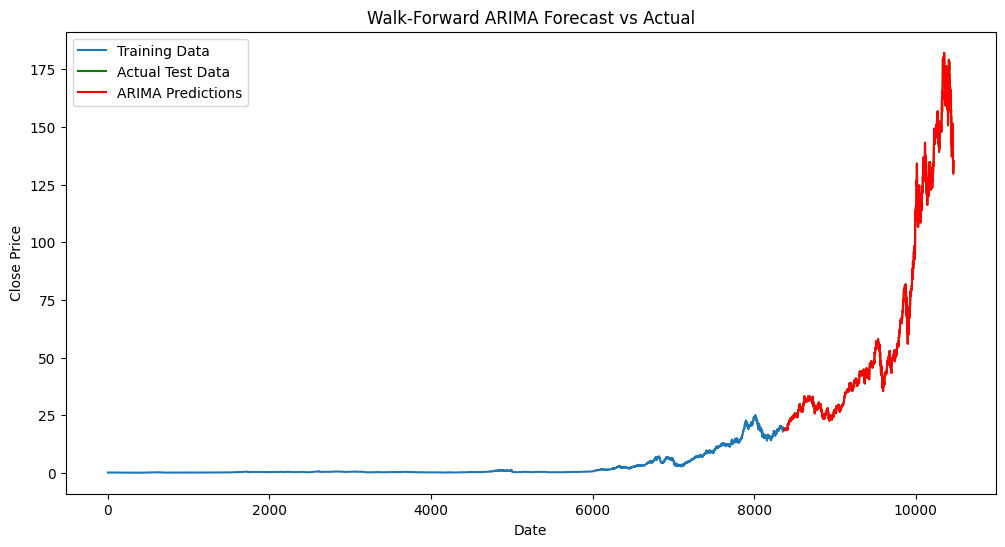

In [17]:
# Create index for test portion
test_index = test_data.index

plt.figure(figsize=(12,6))

# Plot training data
plt.plot(train_data.index, train_data['Close'], label="Training Data")

# Plot actual test data
plt.plot(test_index, test_series, label="Actual Test Data", color='green')

# Plot ARIMA predictions
plt.plot(test_index, predictions, label="ARIMA Predictions", color='red')

plt.title("Walk-Forward ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [19]:
# fit initial model
model = ARIMA(train_series, order=(4,1,4))
model_fit = model.fit()

predictions = []

for t in range(len(test_series)):
    # forecast next value
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)

    # update model with the actual observation
    model_fit = model_fit.append([test_series[t]], refit=False)

print("Predictions generated:", len(predictions))

# Evaluation Metrics
y_true = np.array(test_series)
y_pred = np.array(predictions)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Store results in DataFrame
results_arima = pd.DataFrame({
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae],
    "MAPE": [mape],
    "R2 Score": [r2]
}, index=["ARIMA"])

print("\nARIMA Model Evaluation:")
print(results_arima)

# Model Summary
print("\nARIMA Model Summary:")
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predictions generated: 2094

ARIMA Model Evaluation:
            MSE      RMSE       MAE      MAPE  R2 Score
ARIMA  2.373922  1.540754  0.871556  1.260198  0.998856

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10468
Model:                 ARIMA(4, 1, 4)   Log Likelihood             -207670.743
Date:                Thu, 20 Nov 2025   AIC                         415359.487
Time:                        14:15:21   BIC                         415424.791
Sample:                             0   HQIC                        415381.542
                              - 10468                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6416  

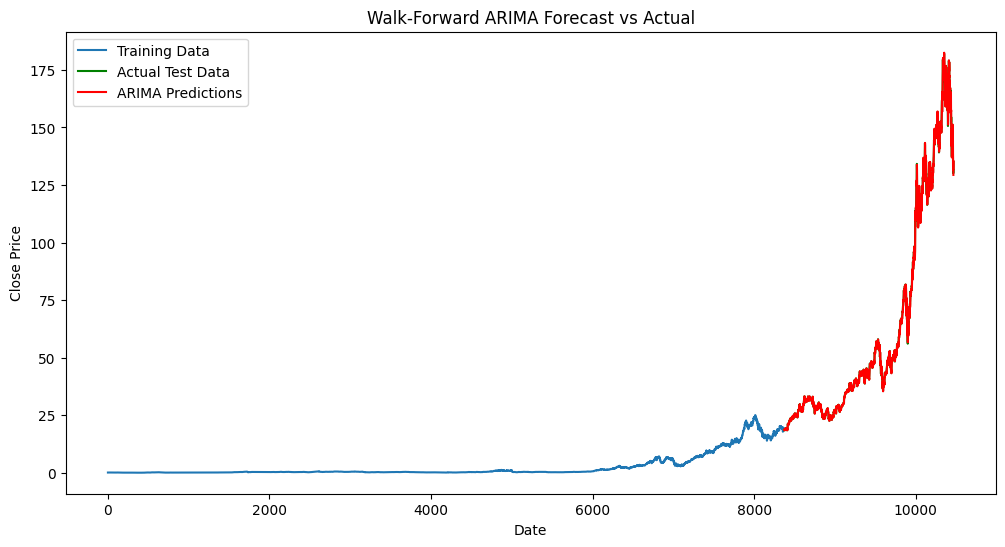

In [20]:
# Create index for test portion
test_index = test_data.index

plt.figure(figsize=(12,6))

# Plot training data
plt.plot(train_data.index, train_data['Close'], label="Training Data")

# Plot actual test data
plt.plot(test_index, test_series, label="Actual Test Data", color='green')

# Plot ARIMA predictions
plt.plot(test_index, predictions, label="ARIMA Predictions", color='red')

plt.title("Walk-Forward ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
